## 0. Data Ingestion, Premliminary Data Analysis

In [25]:
#import ncessary libaries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
import os

In [26]:
# load cleaned data
df = pd.read_csv("cleaned_data.csv")

In [27]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0.0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1.0,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0.0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0.0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0.0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [28]:
def check_for_outliers(df):
     # extracts numerical columns
    num_col = df.select_dtypes(include=["float64","int64"]).columns
     # extracts categorical column
    cat_col = df.select_dtypes(include="object").columns
    #Identify number of outliers
    outlier_columns = []
    for i in num_col:
        q1 = df[i].quantile(0.25)
        q3 = df[i].quantile(0.75)
        iqr = q3 - q1
        lower = q1 - 1.5 * iqr
        upper = q3 + 1.5 * iqr
        outlier_count = ((df[i] < lower) | (df[i] > upper)).sum()
        print(f"The number of outliers for {i} is {outlier_count}")
        if outlier_count > 0:
            outlier_columns.append(i)

    plt.figure(figsize=(10,6))
    sns.boxplot(data=df[num_col])
    plt.title("Boxplot of all Numerical Columns")
    plt.show()

The number of outliers for Dependents is 51
The number of outliers for ApplicantIncome is 50
The number of outliers for CoapplicantIncome is 18
The number of outliers for LoanAmount is 41
The number of outliers for Loan_Amount_Term is 88
The number of outliers for Credit_History is 89


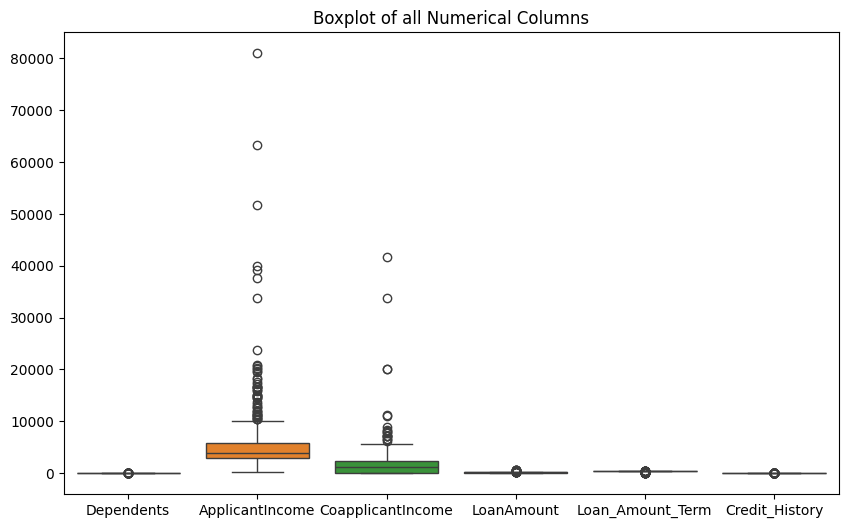

In [29]:
# check for outliers
check_for_outliers(df)


In [30]:
# get the descriptive analysis for the numwercal columns\
def descriptive(df):
    num_cols = df.select_dtypes(include=["float64","int64"]).columns
    return df[num_cols].describe()

----------------------------------------------------------------
 ### **1. Univariate analysis**
 ---------------------------------------------------------------
 

In [31]:
#apply the function
descriptive(df)

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.744300,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,1.009623,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000
25%,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,1.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,3.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [32]:
def univarte_numerical_eda(df, column):
    """ Performs a univarate EDA on a single numerical column.
    Displays summary statistics, skewness, kurtosis, histogram, KDE, and boxplot.
    """
    
    print(f" Feature: {column}")
    print("="*40)
    print(df[column].describe().to_frame())
    print(f"\nSkewness: {df[column].skew():.3f}")
    print(f"Kurtosis: {df[column].kurt():.3f}")
    
    plt.figure(figsize=(12,4))
    
    # Histogram + KDE
    plt.subplot(1,2,1)
    sns.histplot(df[column], kde=True, bins=30, color="teal")
    plt.title(f"\n Distribution of {column}", fontsize=13)
    plt.xlabel(column)
    plt.ylabel("Frequency")
    
    # Boxplot
    plt.subplot(1,2,2)
    sns.boxplot(x=df[column], color="teal")
    plt.title(f"\n Boxplot of {column}", fontsize=13)
    
    plt.tight_layout()
    plt.show()
    
    
      # Optional note on transformation
    if abs(df[column].skew()) > 1:
        print(f"\n {column} is highly skewed. Consider log or Box-Cox transformation.")
    elif abs(df[column].skew()) > 0.5:
        print(f"{column} is moderately skewed.")
    else:
        print(f"{column} is fairly symmetric.")
    

 Feature: Dependents
       Dependents
count  614.000000
mean     0.744300
std      1.009623
min      0.000000
25%      0.000000
50%      0.000000
75%      1.000000
max      3.000000

Skewness: 1.016
Kurtosis: -0.347


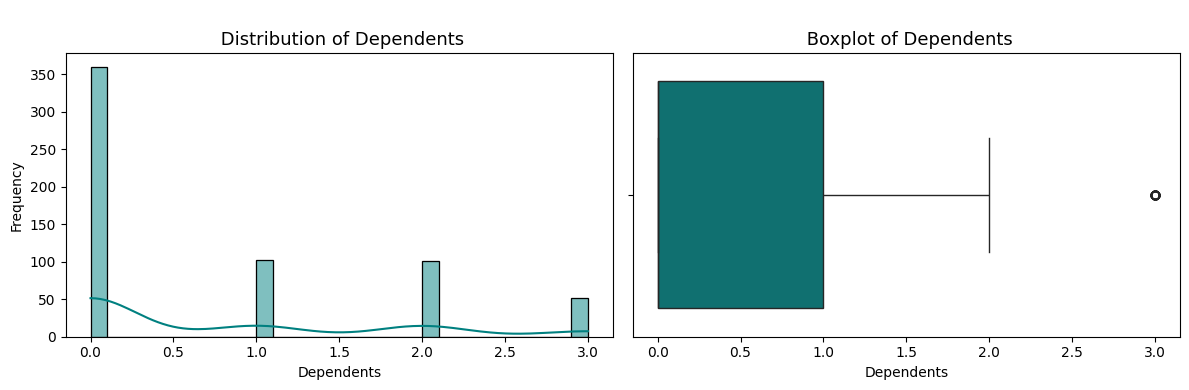


 Dependents is highly skewed. Consider log or Box-Cox transformation.
 Feature: ApplicantIncome
       ApplicantIncome
count       614.000000
mean       5403.459283
std        6109.041673
min         150.000000
25%        2877.500000
50%        3812.500000
75%        5795.000000
max       81000.000000

Skewness: 6.540
Kurtosis: 60.541


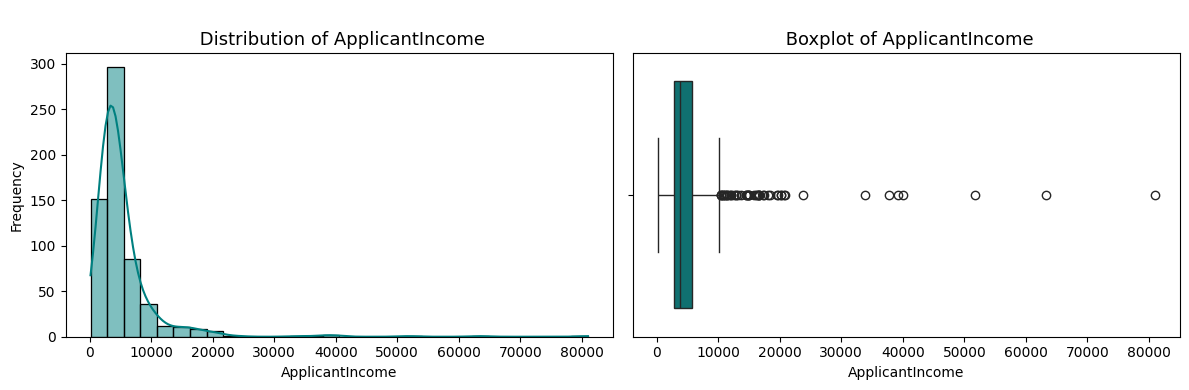


 ApplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: CoapplicantIncome
       CoapplicantIncome
count         614.000000
mean         1621.245798
std          2926.248369
min             0.000000
25%             0.000000
50%          1188.500000
75%          2297.250000
max         41667.000000

Skewness: 7.492
Kurtosis: 84.956


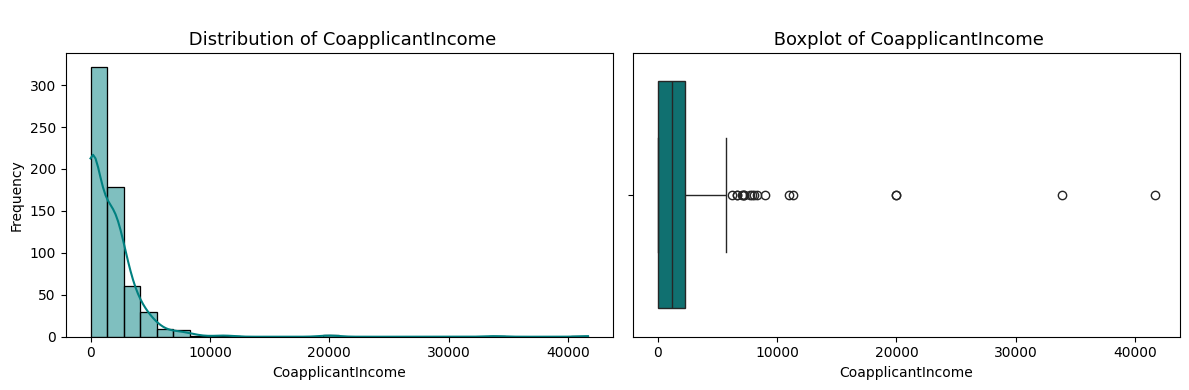


 CoapplicantIncome is highly skewed. Consider log or Box-Cox transformation.
 Feature: LoanAmount
       LoanAmount
count  614.000000
mean   145.752443
std     84.107233
min      9.000000
25%    100.250000
50%    128.000000
75%    164.750000
max    700.000000

Skewness: 2.743
Kurtosis: 10.937


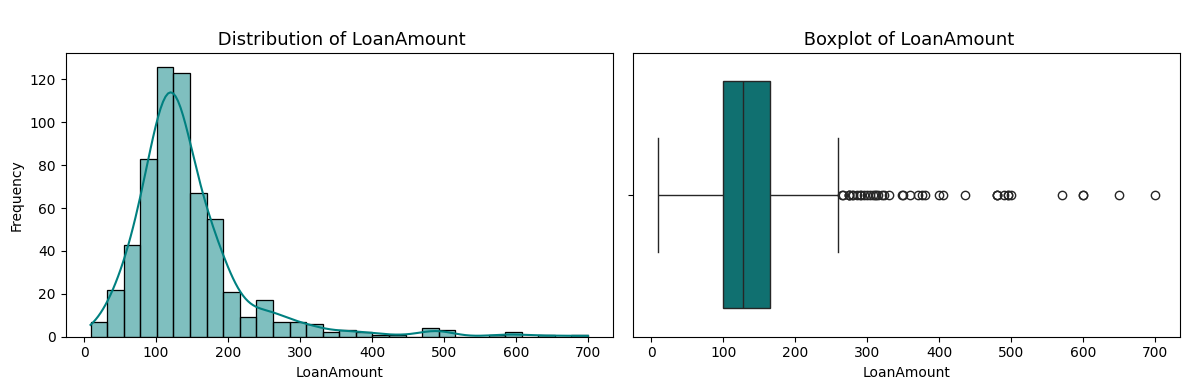


 LoanAmount is highly skewed. Consider log or Box-Cox transformation.
 Feature: Loan_Amount_Term
       Loan_Amount_Term
count        614.000000
mean         342.410423
std           64.428629
min           12.000000
25%          360.000000
50%          360.000000
75%          360.000000
max          480.000000

Skewness: -2.402
Kurtosis: 6.925


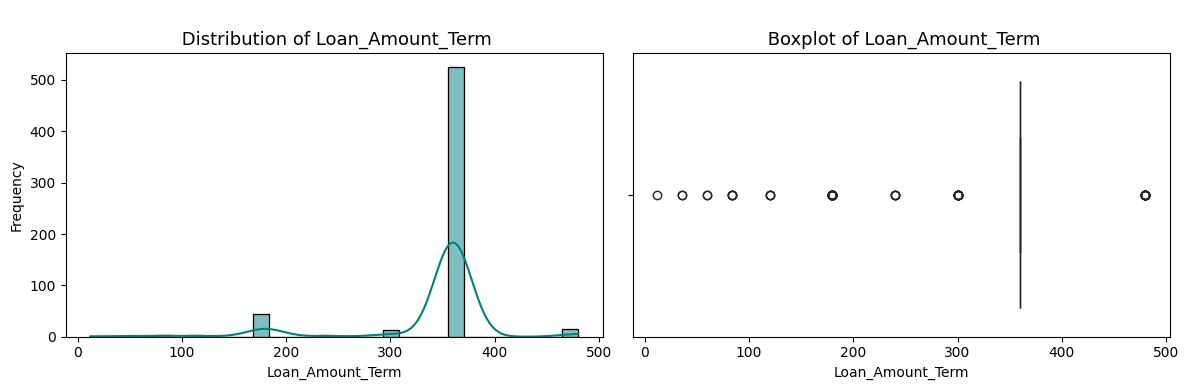


 Loan_Amount_Term is highly skewed. Consider log or Box-Cox transformation.
 Feature: Credit_History
       Credit_History
count      614.000000
mean         0.855049
std          0.352339
min          0.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          1.000000

Skewness: -2.022
Kurtosis: 2.095


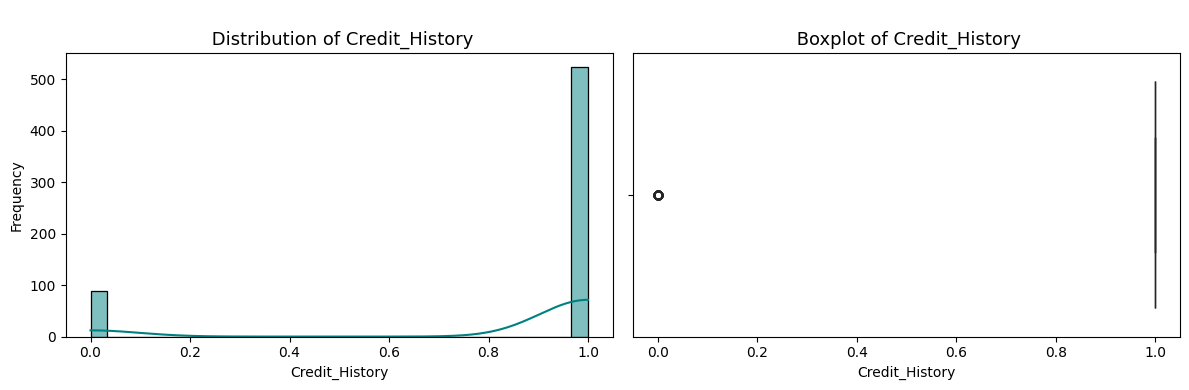


 Credit_History is highly skewed. Consider log or Box-Cox transformation.


In [33]:
num_cols = df.select_dtypes(include=["float64","int64"]).columns
for col in num_cols:
    univarte_numerical_eda(df, col)

In [34]:
def univaraite_categorical_eda(df, col):
    """Performs univariate EDA on a categorical or ordinal column.
    Displays frequency table, proportion, a countplot and piechat.
    """
    # Frequency + Proportion
    frq = df[col].value_counts()
    prop = df[col].value_counts(normalize=True) * 100
    summary = pd.DataFrame({"Count":frq, "Percentage":prop.round(2)})
    print(summary)
    print()
    
    
    plt.figure(figsize=(8,5))
    # Vizualization: Barchat
    plt.subplot(1,2,1)
    ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")
    plt.title(f" Distribution(Barchat) of {col}", fontsize=13)
    plt.xlabel(col)
    plt.ylabel("Count")
    
    
    # Piechat
    plt.subplot(1,2,2)
    df[col].value_counts().plot.pie(autopct="%1.1f%%",startangle=90)
    plt.title(f" Distribution(Piechat) of {col}", fontsize=13)
    
    
      # Annotate each bar with percentage
    total = len(df[col])
    for p in ax.patches:
        height = p.get_height()
        ax.text(p.get_x() + p.get_width()/2, height + 1,
                f'{(height/total)*100:.1f}%', ha='center')
        
        
    
    plt.tight_layout()
    plt.show()
    
    
    

        Count  Percentage
Gender                   
Male      502       81.76
Female    112       18.24



C:\Users\ncc\AppData\Local\Temp\ipykernel_3028\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


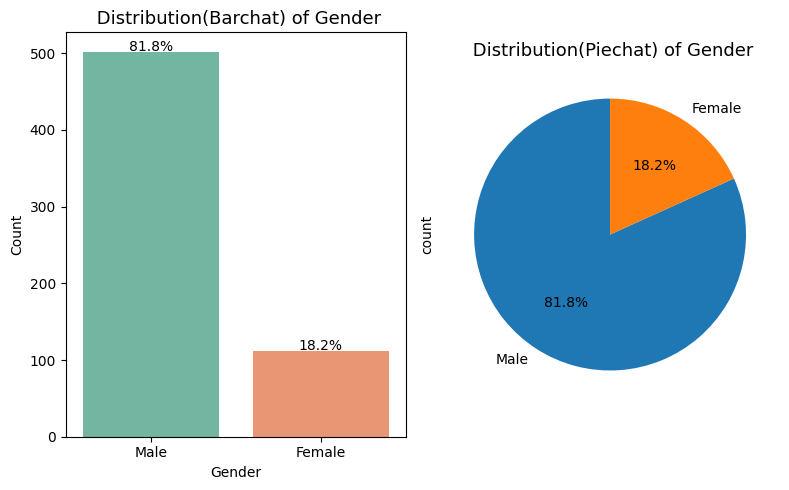

         Count  Percentage
Married                   
Yes        401       65.31
No         213       34.69



C:\Users\ncc\AppData\Local\Temp\ipykernel_3028\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


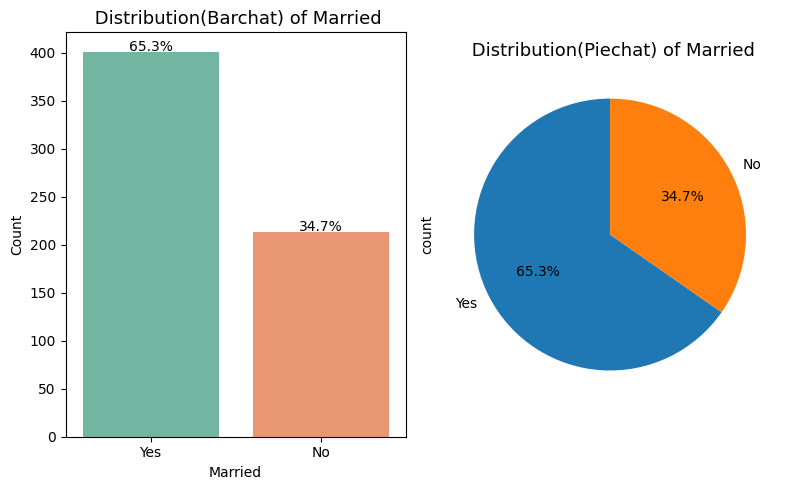

              Count  Percentage
Education                      
Graduate        480       78.18
Not Graduate    134       21.82



C:\Users\ncc\AppData\Local\Temp\ipykernel_3028\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


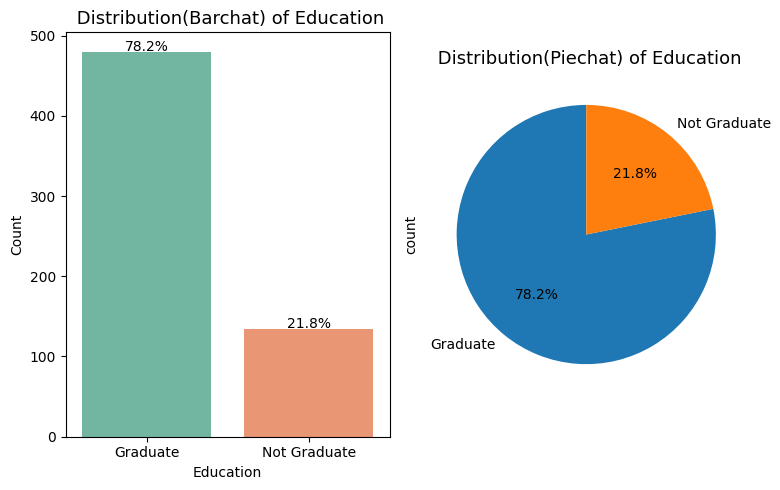

               Count  Percentage
Self_Employed                   
No               532       86.64
Yes               82       13.36



C:\Users\ncc\AppData\Local\Temp\ipykernel_3028\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


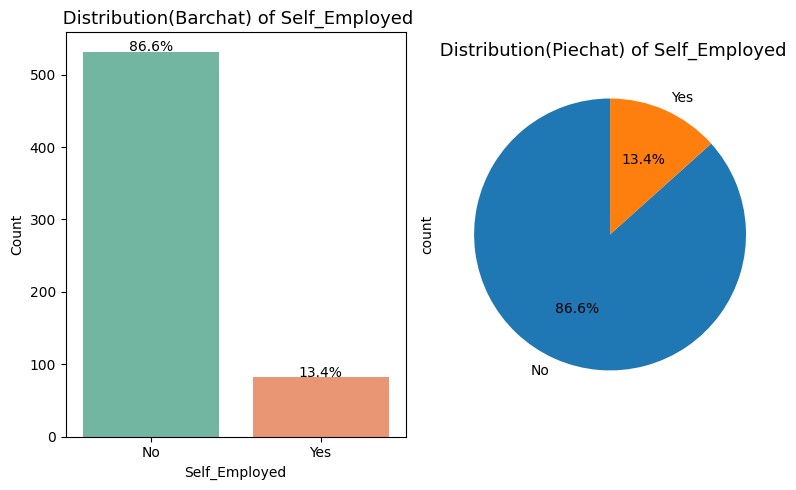

               Count  Percentage
Property_Area                   
Semiurban        233       37.95
Urban            202       32.90
Rural            179       29.15



C:\Users\ncc\AppData\Local\Temp\ipykernel_3028\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


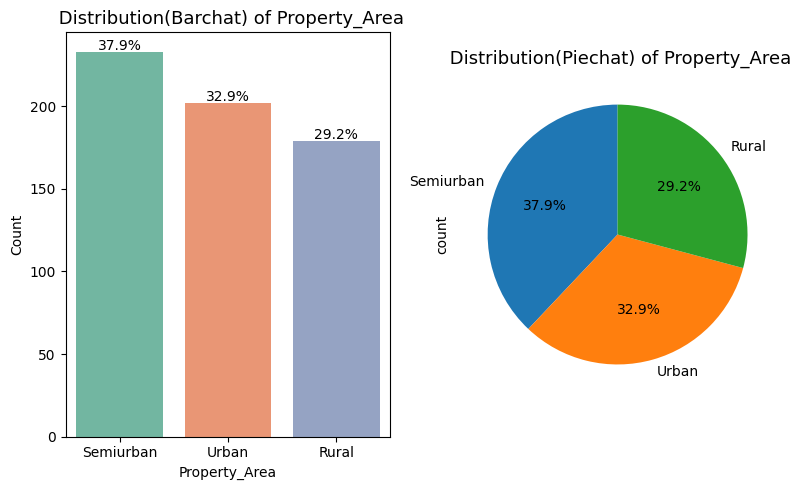

             Count  Percentage
Loan_Status                   
Y              422       68.73
N              192       31.27



C:\Users\ncc\AppData\Local\Temp\ipykernel_3028\13757909.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x=col, data=df, palette="Set2", order=frq.index, color="teal")


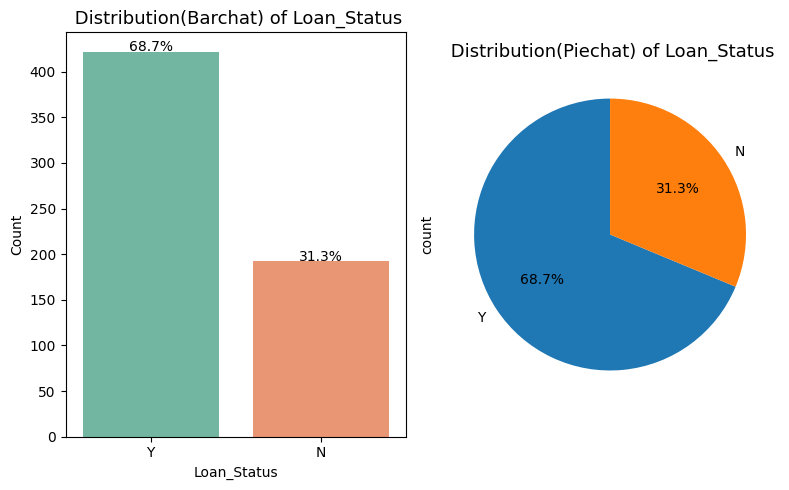

In [35]:
cat_cols = df.select_dtypes(include="object").columns
for col in cat_cols:
    univaraite_categorical_eda(df, col)

### Observations
* We notice imbalance in our target data
* In fact the number of approved home loans is more than twice the number of declined home loans.

----------------------------------------------------------------
 ### **2. Bivariate analysis**
 ---------------------------------------------------------------

In [36]:
# let make our target value a numerical column
df['Loan_Status'] = df['Loan_Status'].map({'Y': 1, 'N':0})


In [37]:
df['Loan_Status']

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 614, dtype: int64

In [38]:
def correlation_with_target(df, target_col, figsize=(10,2)):
    """
    Plots a heatmap showing correlation of each numeric feature against target_col.
    Returns a Series of correlations (sorted by absolute magnitude).
    """
    # Keep only numeric columns
    numeric_df = df.select_dtypes(include='number').copy()
    if target_col not in numeric_df.columns:
        raise ValueError(f"Target column '{target_col}' must be numeric and present in the dataframe.")

    # compute correlations of every numeric column with the target
    corrs = numeric_df.corrwith(numeric_df[target_col]).drop(target_col)

    corrs_df = corrs.to_frame(name='corr').T  # shape (1, n)

    plt.figure(figsize=figsize)
    sns.heatmap(
        corrs_df,
        annot=True,
        fmt=".3f",
        cmap="coolwarm",
        center=0,
        vmin=-1,
        vmax=1,
        cbar_kws={'orientation': 'vertical', 'shrink':0.7}
    )
    plt.xticks(rotation=45, ha='right')
    plt.yticks([0], [target_col], rotation=0)
    plt.title(f'Correlation of numeric features with {target_col}', fontsize=12)
    plt.tight_layout()
    plt.show()

    # return sorted correlations for downstream use
    return corrs.reindex(corrs.abs().sort_values(ascending=False).index)

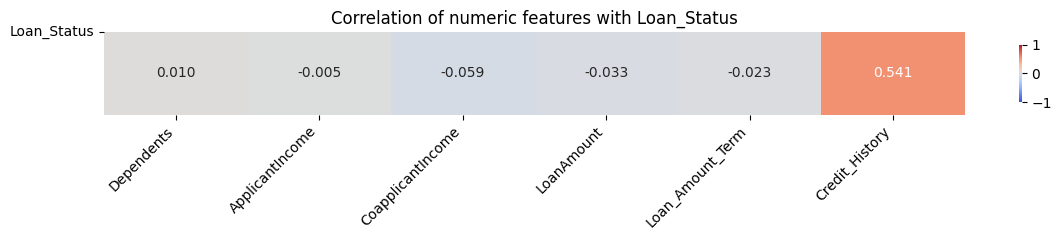

Credit_History       0.540556
CoapplicantIncome   -0.059187
LoanAmount          -0.033214
Loan_Amount_Term    -0.022549
Dependents           0.010118
ApplicantIncome     -0.004710
dtype: float64


In [39]:
corr_series =  correlation_with_target(df, 'Loan_Status', figsize=(12,2.5))
print(corr_series) 

### Observations
* loan_amount has the strongest correlation among our features with our target variable
* Other features have very weak correlation with our target data.
* Further investigations are required to create new features from features that have weak correlation with the target variable.

In [20]:
def reg_plot(data, col1, col2):
    """
    Visualise the relationship between numerical columns using regplot
    """

    """
    Params
    ----------
    data : pd.DataFrame
        Data containing numerical features
    col1 : str
        Name of the first column
    col2 : str
        Name of the second column
    """
    try:
        if col1 in data.columns and col2 in data.columns:
            corr, pvalue = stats.pearsonr(data[col1], data[col2])
            ax = sns.regplot(data = data, x = col1, y = col2, scatter_kws = {'alpha':0.4}, line_kws = {'color': 'red'}, color = "blue")
            ax.set_xlabel(col1)
            ax.set_ylabel(col2)
            ax.set_title(f"{col1} vs {col2} \nCorrelation: {corr:.3f}, p value: {pvalue:.3f}")
            plt.show()
        else:
            raise ValueError("Columns not found in data")
    except ValueError as e:
        print(e)

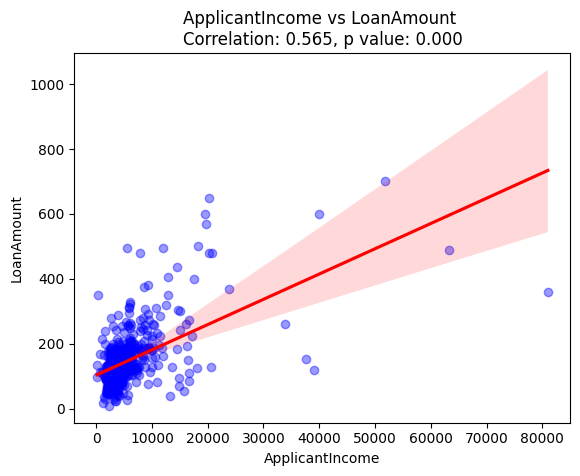

In [21]:
reg_plot(df, "ApplicantIncome", "LoanAmount")

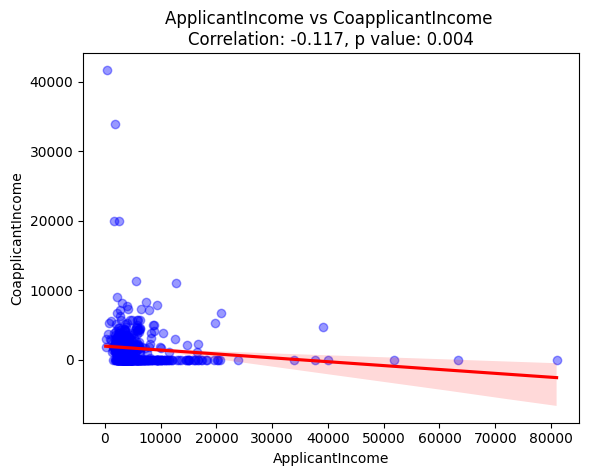

In [22]:
reg_plot(df, "ApplicantIncome", "CoapplicantIncome")

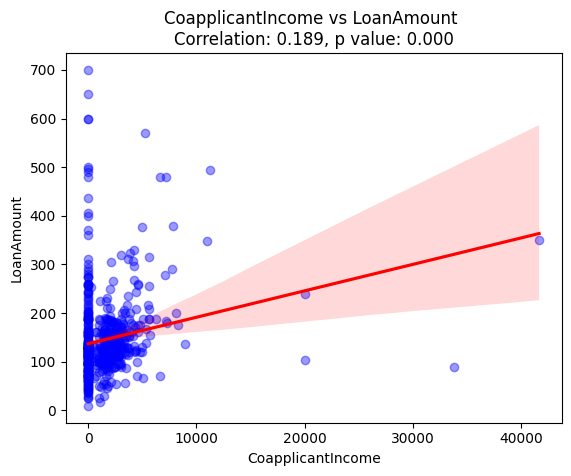

In [23]:
reg_plot(df, "CoapplicantIncome", "LoanAmount")